Referencia: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=92125e403303eb99f2859f7a831433379847dcb13a245663b0d5e91fe08934b8
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [2]:
from IPython.display import Image
%matplotlib inline

Importamos la librería ``torchvision``:

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(0)

**Clickamos en Editar -> Configuración del cuaderno y seleccionamos Acelerador por hardware -> GPU**

In [4]:
!wget https://www.inaccel.com/wp-content/uploads/fpgaplatfroms.png

--2022-01-23 19:41:34--  https://www.inaccel.com/wp-content/uploads/fpgaplatfroms.png
Resolving www.inaccel.com (www.inaccel.com)... 52.203.117.247
Connecting to www.inaccel.com (www.inaccel.com)|52.203.117.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99117 (97K) [image/png]
Saving to: ‘fpgaplatfroms.png’

fpgaplatfroms.png   100%[===================>]  96.79K  --.-KB/s    in 0.1s    

2022-01-23 19:41:35 (766 KB/s) - ‘fpgaplatfroms.png’ saved [99117/99117]



Nos aseguramos de que tenemos una GPU (cuda) y no una CPU. Las GPUs hacen que los modelos de Deep Learning se entrenen mucho más rápido.

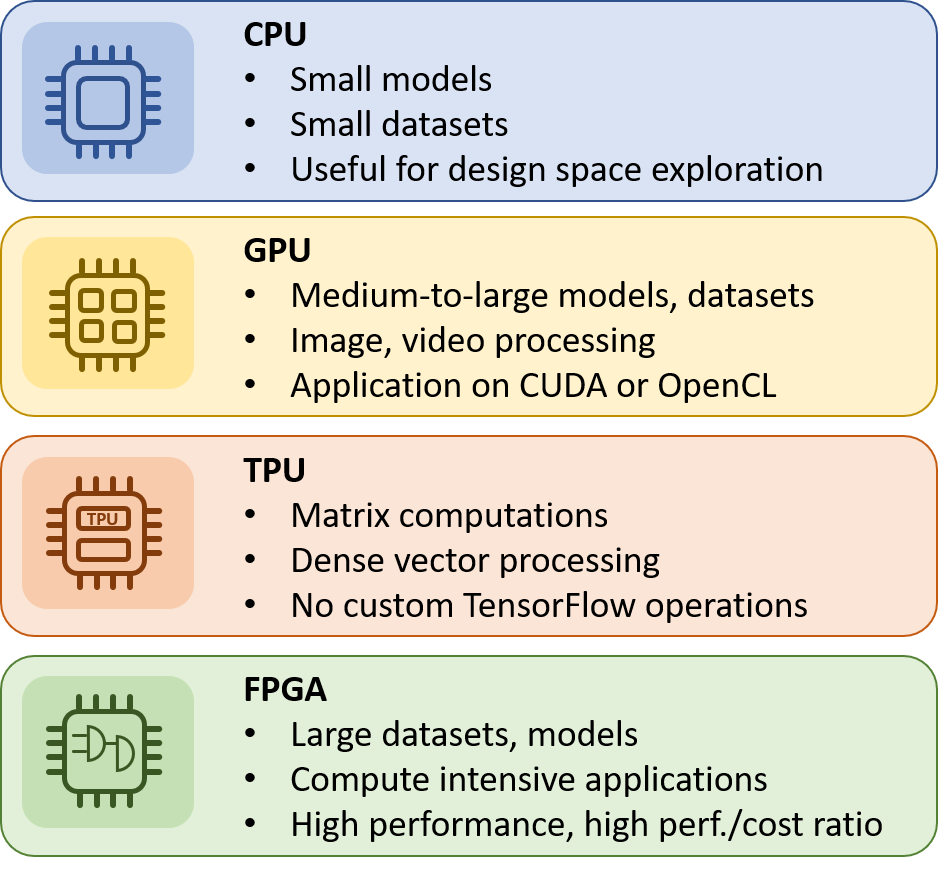

In [5]:
Image("fpgaplatfroms.png",width = 800, height = 800)

In [6]:
# CPU or GPU

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)


Clasificador de imágenes
=====================

Vamos a hacer un tutorial de un clasificador de imágenes. El dataset que usamos es CIFAR10. Este dataset tiene disponibles 10 clases:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

Las imágenes son de tamaño 3x32x32. Es decir, 3 canales de color, cada uno de 32x32 píxeles de tamaño.




In [7]:
!wget https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg

--2022-01-23 19:41:35--  https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg
Resolving production-media.paperswithcode.com (production-media.paperswithcode.com)... 172.67.73.69, 104.26.12.155, 104.26.13.155, ...
Connecting to production-media.paperswithcode.com (production-media.paperswithcode.com)|172.67.73.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178023 (174K) [image/jpeg]
Saving to: ‘CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg’

CIFAR-10-0000000431 100%[===================>] 173.85K  --.-KB/s    in 0.01s   

2022-01-23 19:41:35 (11.6 MB/s) - ‘CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg’ saved [178023/178023]



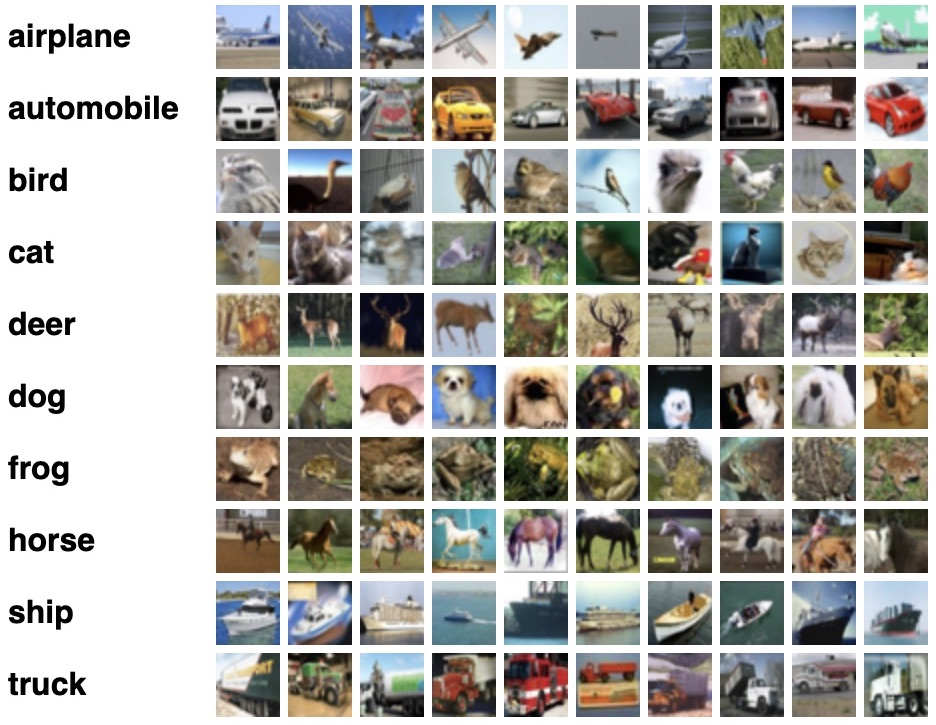

In [8]:
Image("CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg")

Vamos a seguir los siguientes pasos:

1. Cargar y normalizar el dataset de train y test de CIFAR10 usando la librería ``torchvision``
2. Definir una red neuronal convolucional.
3. Definir una función de pérdida.
4. Entrenar la red neuronal con los datos de train.
5. Testear la red con los datos de test.

**1.   Cargar y normalizar CIFAR10**
-------



In [9]:
!wget https://images.squarespace-cdn.com/content/v1/5c28a79ca9e0286061906e43/1548971303762-CKE6Q5C9P67BBU1U33WZ/conv_rgb.png

--2022-01-23 19:41:35--  https://images.squarespace-cdn.com/content/v1/5c28a79ca9e0286061906e43/1548971303762-CKE6Q5C9P67BBU1U33WZ/conv_rgb.png
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to images.squarespace-cdn.com (images.squarespace-cdn.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269235 (263K) [image/png]
Saving to: ‘conv_rgb.png’

conv_rgb.png        100%[===================>] 262.92K  --.-KB/s    in 0.02s   

2022-01-23 19:41:36 (12.2 MB/s) - ‘conv_rgb.png’ saved [269235/269235]



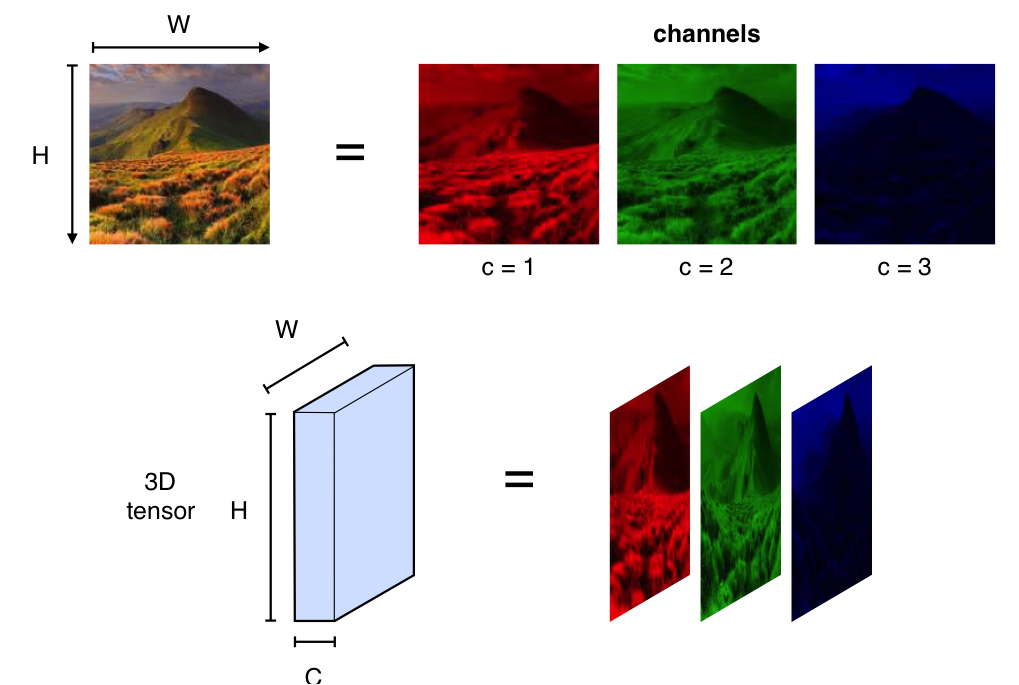

In [10]:
Image("conv_rgb.png")

Los datasets de `torchvision` están en el rango de [0,1]. Nosotros los transformamos (normalizamos) al rango [-1,1]. Lo hacemos porque las redes neuronales funcionan mejor en el rango de valores [-1,1]

Al normalizar, estamos aplicando la siguiente fórmula:

**image = (image - mean) / std**



Si aplicamos una media de 0.5 y una desviación estándar de 0.5, nos quedan valores en el rango de [-1,1]

**Valor mínimo (originalmente 0) = (0-0.5)/0.5=-1**

**Valor máximo (originalmente 1) = (1-0.5)/0.5=1**

In [11]:
transform = transforms.Compose( #Transforms son métodos que se usan para transformar datos.
    [transforms.ToTensor(), #Pasamos los datos a tensores, que es el formato con el que se suele trabajar en Deep Learning
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #Especificamos los valores de mean y std que queremos. En este caso, como hay 3 canales RGB (rojo, verde, azul), tenemos que pasar 3 valores de mean y std.

El batch size indica el número de muestras (imágenes) que se procesan de una sola vez. Los valores típicos son de 2 - 32

In [12]:
batch_size = 4 

Cargamos los datos de train y test pasando la transformada y el batch size que hemos definido:

In [13]:

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Mostramos algunas imágenes del set de train:


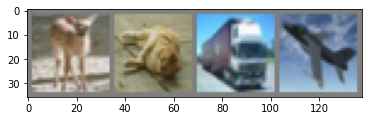

 deer   cat truck plane


In [14]:
import matplotlib.pyplot as plt
import numpy as np



def imshow(img):
    img = img / 2 + 0.5     # desnormalizamos para mostrar las imágenes
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# cogemos algunas imágenes aleatorias del set de train
dataiter = iter(trainloader)
images, labels = dataiter.next()

# mostramos imágenes
imshow(torchvision.utils.make_grid(images))
# mostramos la clase a la que pertenecen las imágenes
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [15]:
!wget https://miro.medium.com/max/1200/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg

--2022-01-23 19:41:44--  https://miro.medium.com/max/1200/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg
Resolving miro.medium.com (miro.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9804, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82785 (81K) [image/jpeg]
Saving to: ‘1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg’

1*XbuW8WuRrAY5pC4t- 100%[===================>]  80.84K  --.-KB/s    in 0.007s  

2022-01-23 19:41:44 (11.2 MB/s) - ‘1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg’ saved [82785/82785]



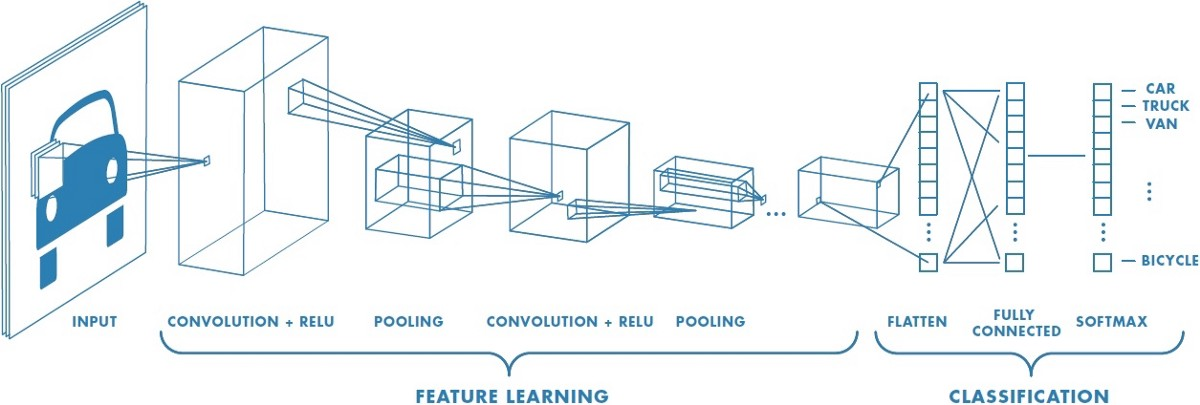

In [16]:
Image("1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg")

In [17]:
!wget https://res.cloudinary.com/practicaldev/image/fetch/s--jmMWlgmi--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/KrvpqL7/cnn-convoluted.png

--2022-01-23 19:41:44--  https://res.cloudinary.com/practicaldev/image/fetch/s--jmMWlgmi--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/KrvpqL7/cnn-convoluted.png
Resolving res.cloudinary.com (res.cloudinary.com)... 151.101.1.137, 151.101.65.137, 151.101.129.137, ...
Connecting to res.cloudinary.com (res.cloudinary.com)|151.101.1.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47554 (46K) [image/jpeg]
Saving to: ‘cnn-convoluted.png’

cnn-convoluted.png  100%[===================>]  46.44K  --.-KB/s    in 0.007s  

2022-01-23 19:41:44 (6.19 MB/s) - ‘cnn-convoluted.png’ saved [47554/47554]



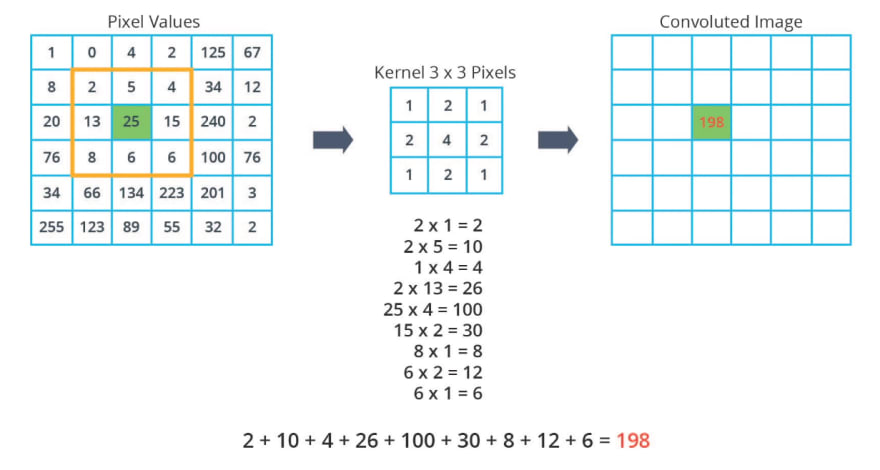

In [18]:
Image("cnn-convoluted.png")

In [19]:
!wget https://miro.medium.com/max/1400/1*PHpYLRHMJ5VbA6qODA40yQ.png

--2022-01-23 19:41:44--  https://miro.medium.com/max/1400/1*PHpYLRHMJ5VbA6qODA40yQ.png
Resolving miro.medium.com (miro.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9804, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294133 (287K) [image/png]
Saving to: ‘1*PHpYLRHMJ5VbA6qODA40yQ.png’

1*PHpYLRHMJ5VbA6qOD 100%[===================>] 287.24K  --.-KB/s    in 0.02s   

2022-01-23 19:41:44 (11.9 MB/s) - ‘1*PHpYLRHMJ5VbA6qODA40yQ.png’ saved [294133/294133]



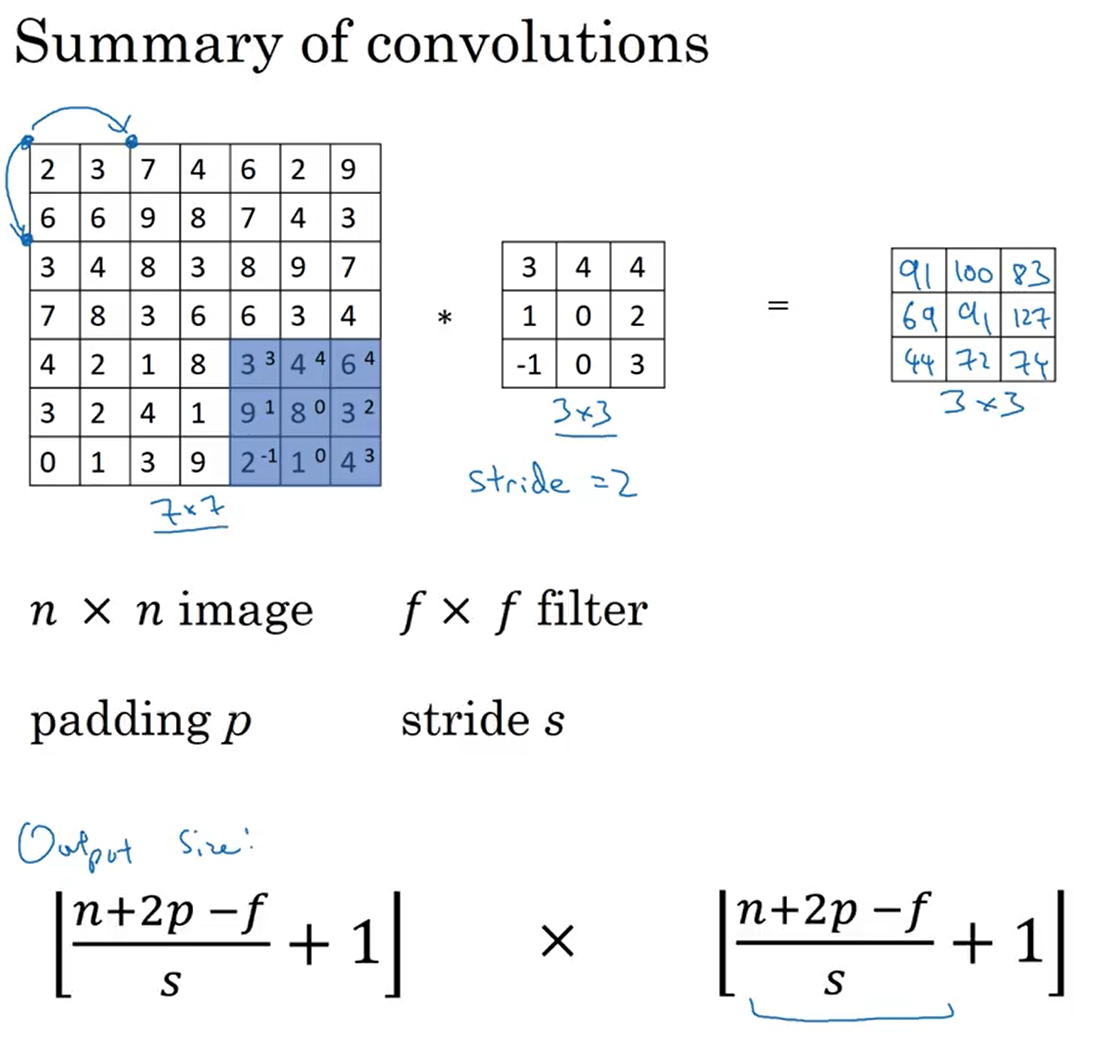

In [20]:
Image("1*PHpYLRHMJ5VbA6qODA40yQ.png",width = 800, height = 800)

In [21]:
!wget https://929687.smushcdn.com/2407837/wp-content/uploads/2021/05/relu_activation.png

--2022-01-23 19:41:44--  https://929687.smushcdn.com/2407837/wp-content/uploads/2021/05/relu_activation.png
Resolving 929687.smushcdn.com (929687.smushcdn.com)... 151.139.240.19
Connecting to 929687.smushcdn.com (929687.smushcdn.com)|151.139.240.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5734 (5.6K) [image/png]
Saving to: ‘relu_activation.png’

relu_activation.png 100%[===================>]   5.60K  --.-KB/s    in 0s      

2022-01-23 19:41:45 (877 MB/s) - ‘relu_activation.png’ saved [5734/5734]



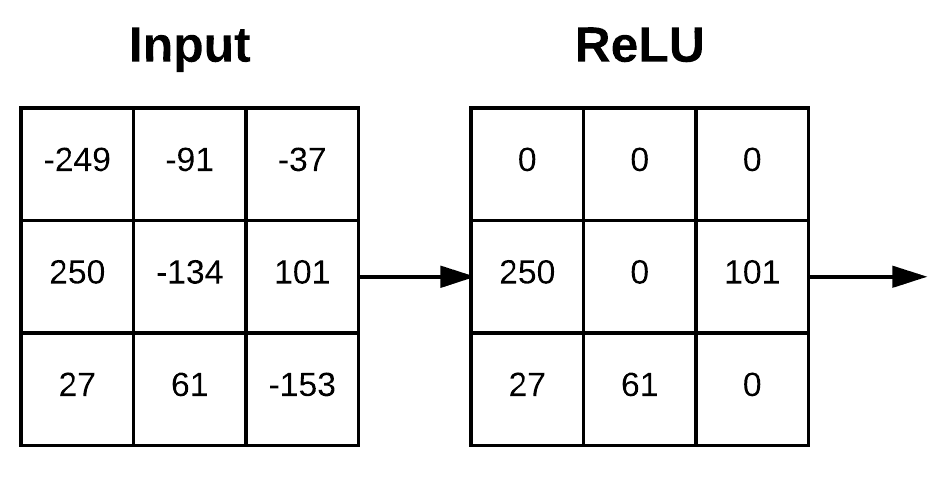

In [22]:
Image("relu_activation.png", width = 800, height = 400)

In [23]:
!wget https://production-media.paperswithcode.com/methods/MaxpoolSample2.png

--2022-01-23 19:41:45--  https://production-media.paperswithcode.com/methods/MaxpoolSample2.png
Resolving production-media.paperswithcode.com (production-media.paperswithcode.com)... 104.26.13.155, 172.67.73.69, 104.26.12.155, ...
Connecting to production-media.paperswithcode.com (production-media.paperswithcode.com)|104.26.13.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68061 (66K) [image/png]
Saving to: ‘MaxpoolSample2.png’

MaxpoolSample2.png  100%[===================>]  66.47K  --.-KB/s    in 0.008s  

2022-01-23 19:41:45 (7.89 MB/s) - ‘MaxpoolSample2.png’ saved [68061/68061]



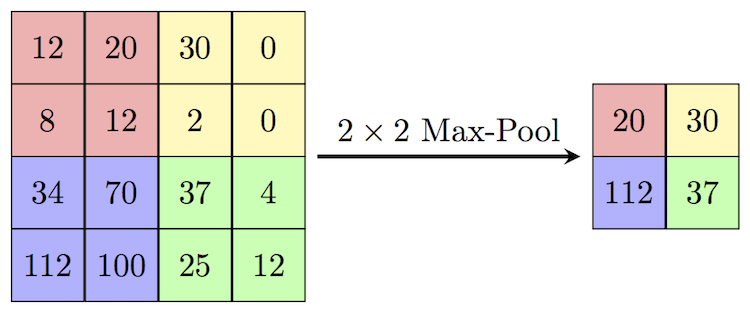

In [24]:
Image("MaxpoolSample2.png")

In [25]:
!wget https://2.bp.blogspot.com/-3ksdXWpKjoQ/WuB25UcE4BI/AAAAAAAACLM/0gX4gwQxKoAvF8dbueTH1-b-W4xCjSSEACLcBGAs/s1600/CNN_6.png

--2022-01-23 19:41:45--  https://2.bp.blogspot.com/-3ksdXWpKjoQ/WuB25UcE4BI/AAAAAAAACLM/0gX4gwQxKoAvF8dbueTH1-b-W4xCjSSEACLcBGAs/s1600/CNN_6.png
Resolving 2.bp.blogspot.com (2.bp.blogspot.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to 2.bp.blogspot.com (2.bp.blogspot.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17087 (17K) [image/png]
Saving to: ‘CNN_6.png’

CNN_6.png           100%[===================>]  16.69K  --.-KB/s    in 0s      

2022-01-23 19:41:45 (98.6 MB/s) - ‘CNN_6.png’ saved [17087/17087]



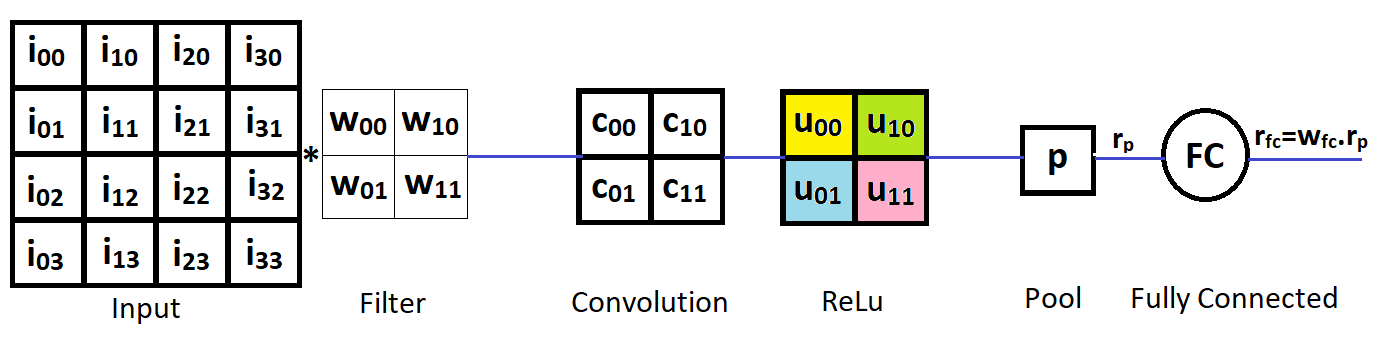

In [26]:
Image("CNN_6.png")

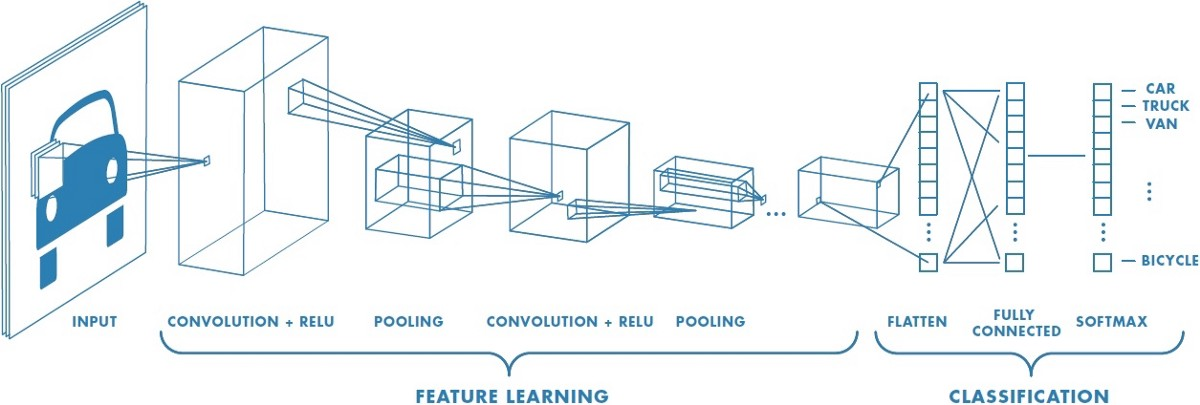

In [27]:
Image("1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg")

In [28]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png

--2022-01-23 19:41:45--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.104.243
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.104.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49411 (48K) [image/png]
Saving to: ‘73_blog_image_1.png’

73_blog_image_1.png 100%[===================>]  48.25K  --.-KB/s    in 0.1s    

2022-01-23 19:41:46 (379 KB/s) - ‘73_blog_image_1.png’ saved [49411/49411]



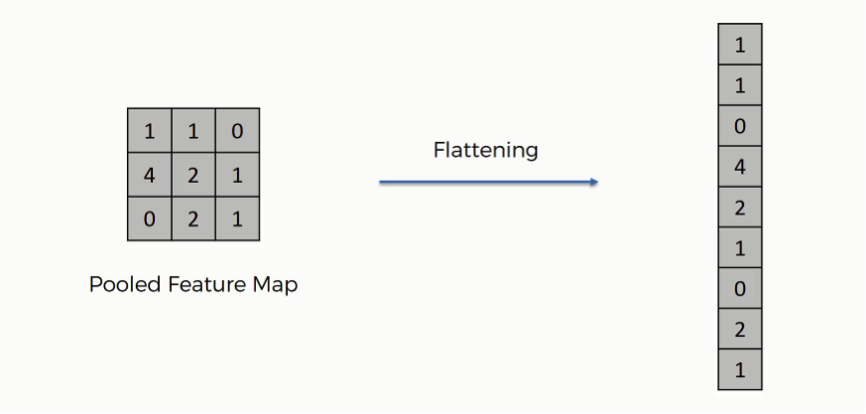

In [29]:
Image("73_blog_image_1.png")

In [30]:
!wget https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png

--2022-01-23 19:41:46--  https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67106 (66K) [image/png]
Saving to: ‘cnn_banner.png’

cnn_banner.png      100%[===================>]  65.53K  --.-KB/s    in 0.05s   

2022-01-23 19:41:46 (1.22 MB/s) - ‘cnn_banner.png’ saved [67106/67106]



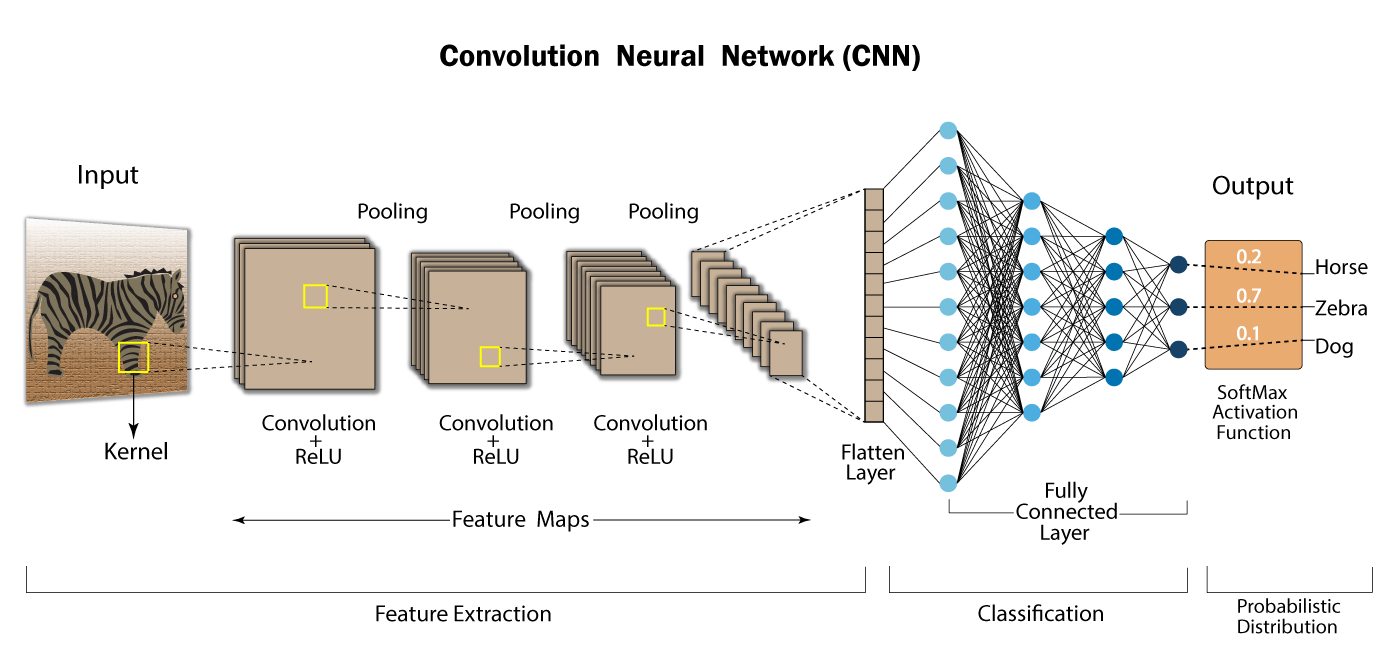

In [31]:
Image("cnn_banner.png")

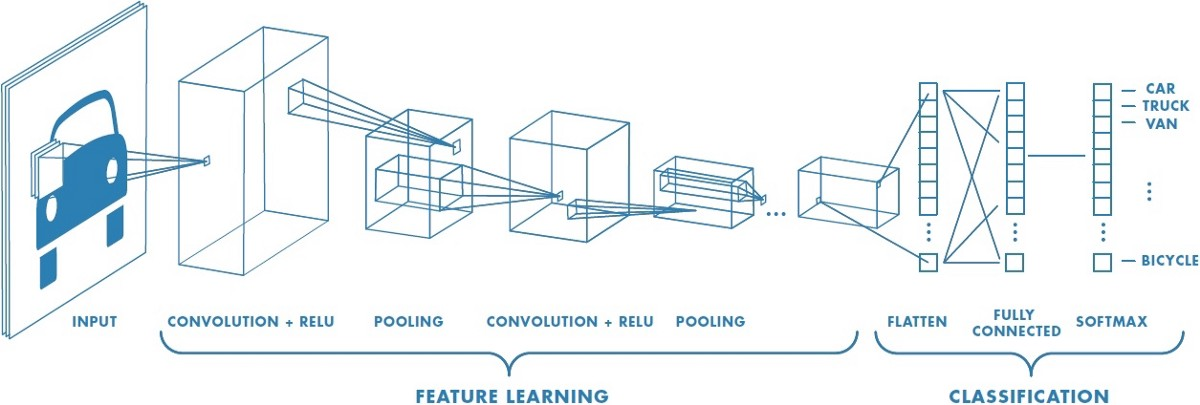

In [32]:
Image("1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg")

**2.   Definición de la red convolucional**
-------


In [33]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)#torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #CONVOLUCIÓN: Fórmula de salida: ((32+2*0-5)/1)+1 = 28 --> Imagen final de 6 x 28 x 28
        #RELU: no cambia el tamaño de la imagen.
        #MAX POOLING 2X2 --> #---> Imagen final de 6 x 14 x 14
        x = self.pool(F.relu(self.conv1(x))) 


        #CONVOLUCIÓN: Fórmula de salida: ((14+2*0-5)/1)+1 = 10 --> Imagen final de 16 x 10 x 10
        #RELU: no cambia el tamaño de la imagen.
        #MAX POOLING 2X2 --> #---> Imagen final de 16 x 5 x 5
        x = self.pool(F.relu(self.conv2(x)))


        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Definimos una función de pérdida, en este caso Cross Entropy Loss. Esta función de pérdida ya implementa softmax dentro de ella, por eso no se ha incluido softmax antes.

In [34]:
criterion = nn.CrossEntropyLoss()

Definimos un optimizador. En este caso SGD (Stochastic Gradient Descent)

In [35]:
!wget https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png

--2022-01-23 19:41:47--  https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png
Resolving www.jeremyjordan.me (www.jeremyjordan.me)... 151.101.3.7, 151.101.67.7, 151.101.131.7, ...
Connecting to www.jeremyjordan.me (www.jeremyjordan.me)|151.101.3.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74902 (73K) [image/png]
Saving to: ‘Screen-Shot-2018-02-24-at-11.47.09-AM.png’

Screen-Shot-2018-02 100%[===================>]  73.15K  --.-KB/s    in 0.009s  

2022-01-23 19:41:47 (7.74 MB/s) - ‘Screen-Shot-2018-02-24-at-11.47.09-AM.png’ saved [74902/74902]



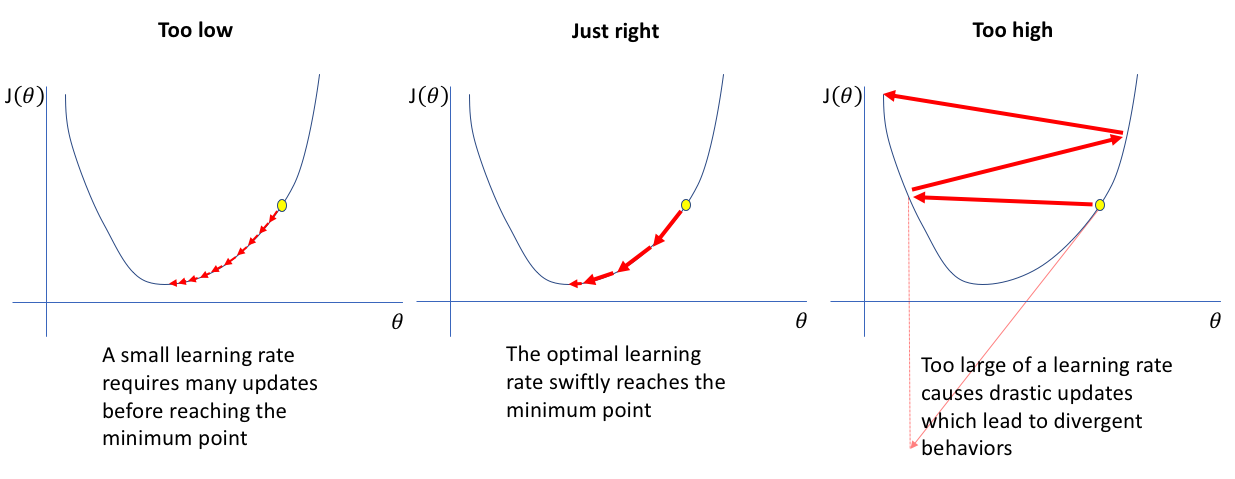

In [36]:
Image("Screen-Shot-2018-02-24-at-11.47.09-AM.png")

In [37]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Pasamos el modelo a la gpu:

In [38]:
# checking if GPU is available
if torch.cuda.is_available():
    net = net.cuda()
    criterion = criterion.cuda()

**4.   Entrenamiento de la red**
-------

In [39]:
!wget https://i.stack.imgur.com/Z2BOz.png

--2022-01-23 19:41:56--  https://i.stack.imgur.com/Z2BOz.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.52.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94198 (92K) [image/png]
Saving to: ‘Z2BOz.png’

Z2BOz.png           100%[===================>]  91.99K  --.-KB/s    in 0.009s  

2022-01-23 19:41:56 (10.5 MB/s) - ‘Z2BOz.png’ saved [94198/94198]



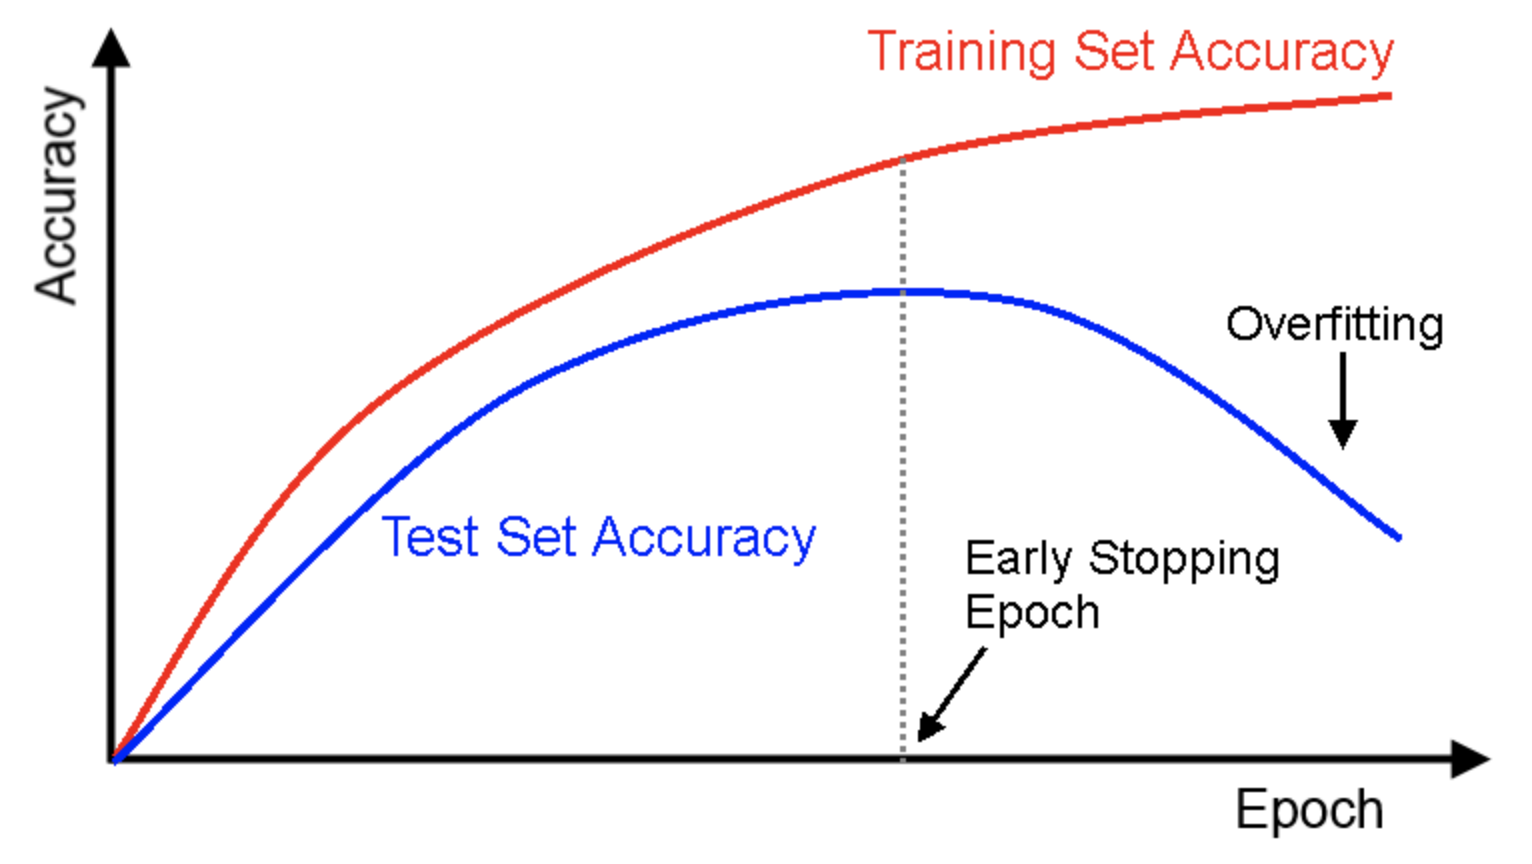

In [40]:
Image("Z2BOz.png", width = 800, height = 500)

In [41]:
!wget https://developer.nvidia.com/blog/wp-content/uploads/2015/08/training_inference1.png

--2022-01-23 19:41:57--  https://developer.nvidia.com/blog/wp-content/uploads/2015/08/training_inference1.png
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118312 (116K) [image/png]
Saving to: ‘training_inference1.png’

training_inference1 100%[===================>] 115.54K  --.-KB/s    in 0.01s   

2022-01-23 19:41:57 (9.51 MB/s) - ‘training_inference1.png’ saved [118312/118312]



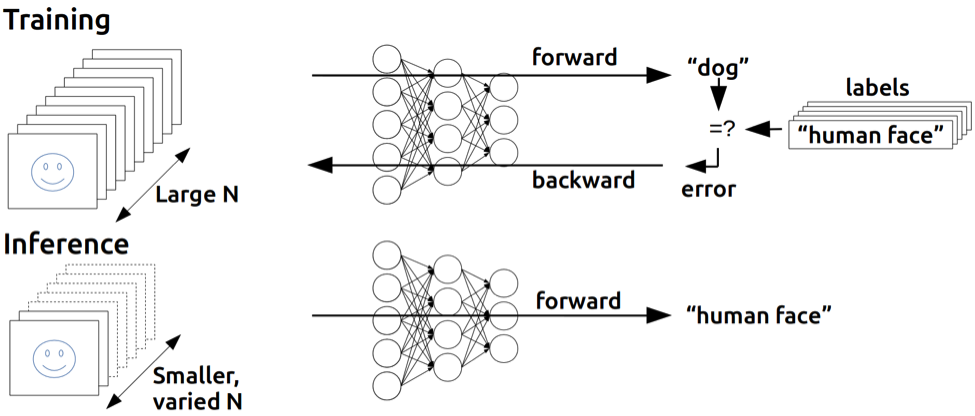

In [42]:
Image("https://developer.nvidia.com/blog/wp-content/uploads/2015/08/training_inference1.png")

In [43]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        if torch.cuda.is_available():
                  inputs = inputs.cuda()
                  labels = labels.cuda()  

        # Training pass
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.246
[1,  4000] loss: 1.856
[1,  6000] loss: 1.681
[1,  8000] loss: 1.581
[1, 10000] loss: 1.529
[1, 12000] loss: 1.462
[2,  2000] loss: 1.407
[2,  4000] loss: 1.372
[2,  6000] loss: 1.334
[2,  8000] loss: 1.317
[2, 10000] loss: 1.281
[2, 12000] loss: 1.250
[3,  2000] loss: 1.170
[3,  4000] loss: 1.208
[3,  6000] loss: 1.190
[3,  8000] loss: 1.177
[3, 10000] loss: 1.163
[3, 12000] loss: 1.146
Finished Training


Guardamos el modelo entrenado:



In [44]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

**5. Probamos el modelo con los datos de test**
-------

In [45]:
!wget https://blog.yudiz.com/wp-content/uploads/2019/05/machine-learning_image3.jpg

--2022-01-23 19:44:26--  https://blog.yudiz.com/wp-content/uploads/2019/05/machine-learning_image3.jpg
Resolving blog.yudiz.com (blog.yudiz.com)... 139.59.18.137
Connecting to blog.yudiz.com (blog.yudiz.com)|139.59.18.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52965 (52K) [image/jpeg]
Saving to: ‘machine-learning_image3.jpg’

machine-learning_im 100%[===================>]  51.72K   135KB/s    in 0.4s    

2022-01-23 19:44:27 (135 KB/s) - ‘machine-learning_image3.jpg’ saved [52965/52965]



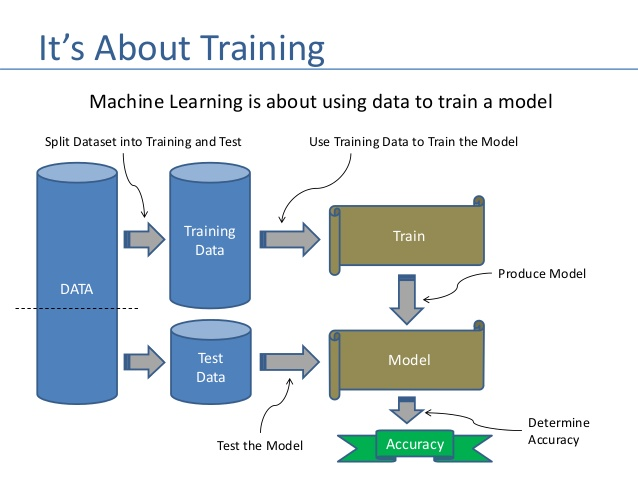

In [46]:
Image("machine-learning_image3.jpg")

Visualizamos algunas imágenes del test para familiarizarnos:

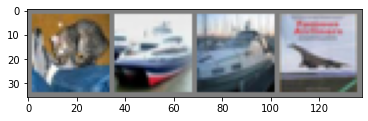

GroundTruth:    cat  ship  ship plane


In [47]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Vamos a cargar el modelo que teníamos entrenado:

In [48]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Ahora vemos qué predice la red para las 4 imágenes de arriba:

In [49]:
outputs = net(images)

La red devuelve la probabilidad de cada imagen pertenezca a cada una de las 10 clases que hay en el dataset. La predicción será la imagen de mayor probabilida, así que nos quedamos con el máximo:


In [50]:
_, predicted = torch.max(outputs, 1)

Y mostramos el nombre de esas clases:

In [51]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


En vez de quedarnos con 4 imágenes, vamos a ver la precisión del modelo con todos los datos de test:

In [52]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


Si el modelo fuera aleatorio, como hay 10 clases, la precisión sería 10%. ¡La precisión de nuestro modelo es mucho mayor que eso, por lo que parece que el modelo está funcionando!

Ahora vemos cuáles son las clases para las que funciona mejor y para cuáles peor:


In [53]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net(images)    
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))

Accuracy for class plane is: 56.7 %
Accuracy for class car   is: 61.3 %
Accuracy for class bird  is: 45.1 %
Accuracy for class cat   is: 40.7 %
Accuracy for class deer  is: 56.1 %
Accuracy for class dog   is: 47.4 %
Accuracy for class frog  is: 66.8 %
Accuracy for class horse is: 66.6 %
Accuracy for class ship  is: 77.7 %
Accuracy for class truck is: 76.0 %
